In [395]:
%config Completer.use_jedi = False
import pandas as pd
import numpy as np
# !pip install matplotlib
# !pip install seaborn
# !pip install smogn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
# import smogn
from sklearn import metrics   

In [639]:
train_data=pd.read_csv('../Datasets/traindata.csv')
test_data=pd.read_csv('../Datasets/testdata.csv')

In [640]:
print('Train_data_details \n Shape: {}\n Columns:\n\t{}\n '.format(train_data.shape ,train_data.columns,train_data.info()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13999 entries, 0 to 13998
Columns: 215 entries, ID to TARGET
dtypes: float64(60), int64(155)
memory usage: 23.0 MB
Train_data_details 
 Shape: (13999, 215)
 Columns:
	Index(['ID', 'var3', 'var15', 'imp_ent_var16_ult1', 'imp_op_var39_comer_ult1',
       'imp_op_var39_comer_ult3', 'imp_op_var40_comer_ult1',
       'imp_op_var40_ult1', 'imp_op_var41_comer_ult1',
       'imp_op_var41_comer_ult3',
       ...
       'saldo_medio_var13_medio_ult1', 'saldo_medio_var17_ult3',
       'saldo_medio_var29_hace2', 'saldo_medio_var29_hace3',
       'saldo_medio_var29_ult1', 'saldo_medio_var33_hace3',
       'saldo_medio_var33_ult3', 'saldo_medio_var44_hace3', 'var38', 'TARGET'],
      dtype='object', length=215)
 


Features_shape	(13999, 13) Label_shape	(13999,)


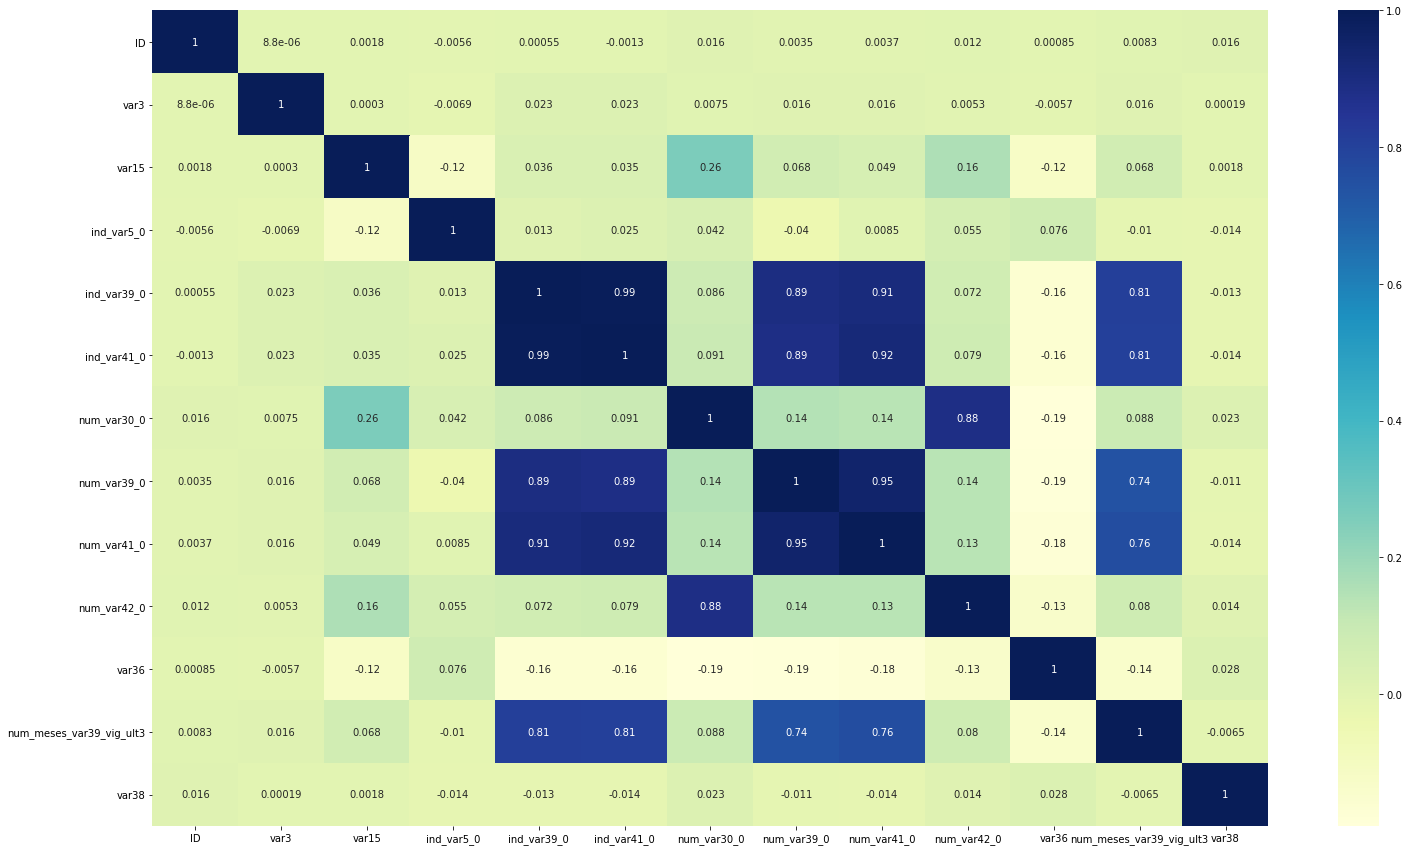

In [641]:
features_df_1 = train_df.loc[:, (train_df==0).mean() < .20] #Drop columns with more than 70% zeros
print('Features_shape\t{} Label_shape\t{}'.format(features_df_1.shape,train_data['TARGET'].shape))
# features_df['ind_var30'].hist()
plt.figure(figsize=(25,15)) 
sns.heatmap(features_df_1.corr(), annot=True,cmap="YlGnBu")


Features_shape	(13999, 27) Label_shape	(13999,)


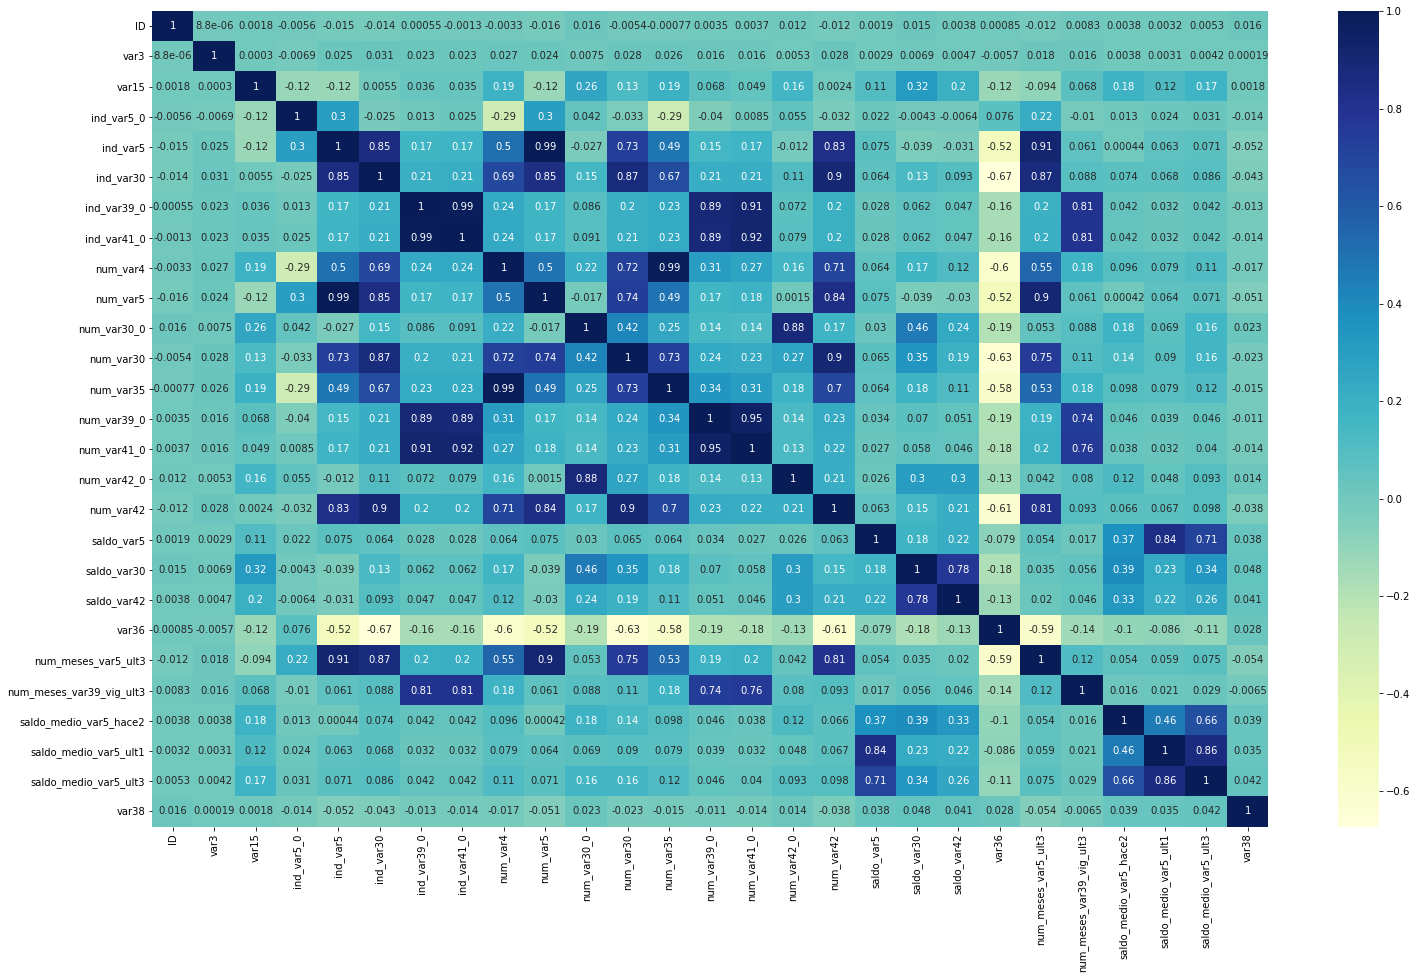

In [314]:
features_df_2 = train_df.loc[:, (train_df==0).mean() < .40] #Drop columns with more than 70% zeros
print('Features_shape\t{} Label_shape\t{}'.format(features_df_2.shape,train_data['TARGET'].shape))
# features_df['ind_var30'].hist()
plt.figure(figsize=(25,15)) 
sns.heatmap(features_df_2.corr(), annot=True,cmap="YlGnBu")

Features_shape	(13999, 29) Label_shape	(13999,)


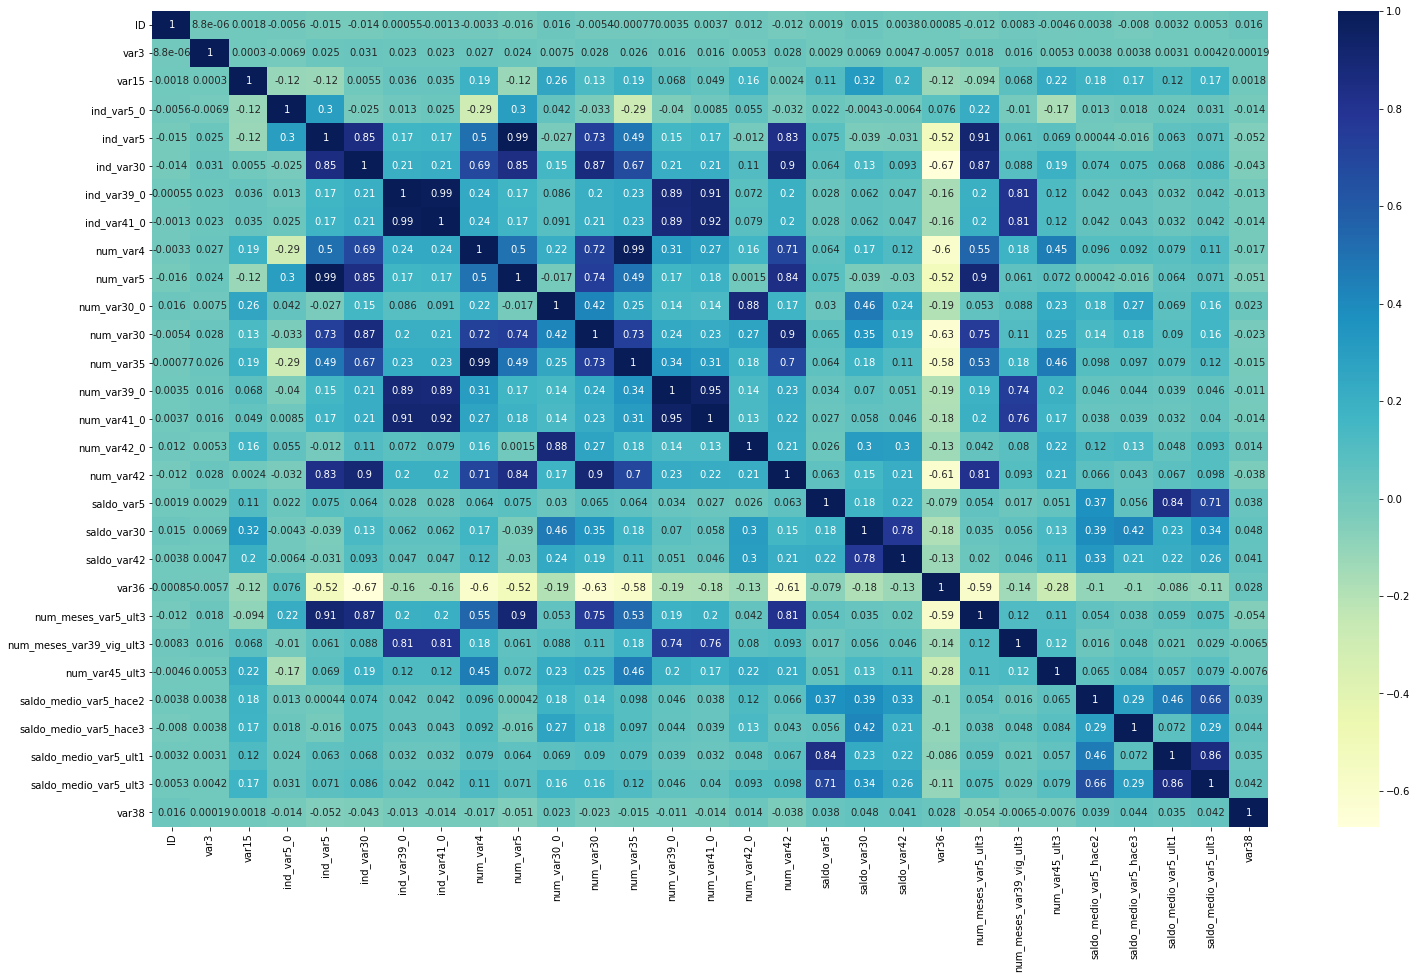

In [316]:
features_df_3 = train_df.loc[:, (train_df==0).mean() < .60] #Drop columns with more than 70% zeros
print('Features_shape\t{} Label_shape\t{}'.format(features_df_3.shape,train_data['TARGET'].shape))
# features_df['ind_var30'].hist()
plt.figure(figsize=(25,15)) 
sns.heatmap(features_df_3.corr(), annot=True,cmap="YlGnBu")


Features_shape	(13999, 33) Label_shape	(13999,)


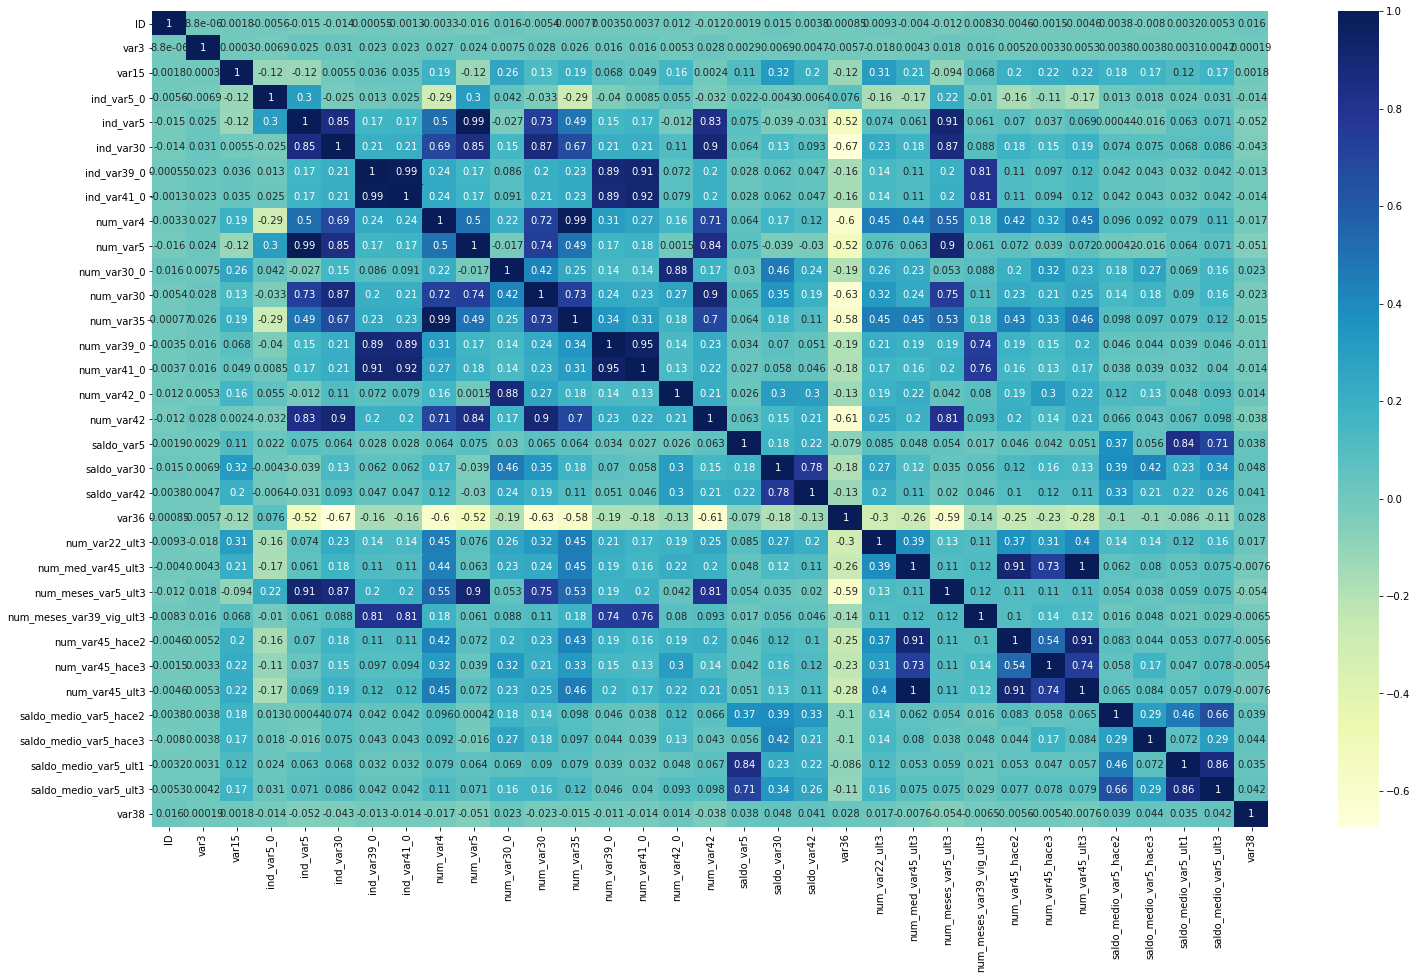

In [318]:
features_df_4 = train_df.loc[:, (train_df==0).mean() < .70] #Drop columns with more than 70% zeros
print('Features_shape\t{} Label_shape\t{}'.format(features_df_4.shape,train_data['TARGET'].shape))
# features_df['ind_var30'].hist()
plt.figure(figsize=(25,15)) 
sns.heatmap(features_df_4.corr(), annot=True,cmap="YlGnBu")

In [644]:
def remove_unwanted_features(df):
    df=df.astype(object)
    df = train_data.loc[:, (train_data==0).mean() < .7]   #Drop columns with more than 70% zeros
    return df    
train_df=remove_unwanted_features(train_data)

In [292]:
# from IPython.display import IFrame
# wiki=IFrame('https://en.wikipedia.org/wiki/Pearson_correlation_coefficient',width=1000,height=400)
# display(wiki)


In [645]:
X=train_df
y=train_data['TARGET'].astype(bool).astype(int)
X

ID  var3  var15  ind_var5_0  ind_var5  ind_var30  ind_var39_0  \
0      142882     2     55           1         1          1            1   
1      116073     2     26           1         1          1            1   
2       40727     2     31           1         1          1            1   
3       96753    89     55           0         0          0            1   
4      105319     2     24           1         1          1            1   
...       ...   ...    ...         ...       ...        ...          ...   
13994   30124     2     28           1         1          1            1   
13995   77621     2     24           1         1          1            0   
13996   84866     2     23           1         1          1            1   
13997   80860     2      9           0         0          1            0   
13998    9460     2     25           1         1          1            1   

       ind_var41_0  num_var4  num_var5  ...  num_meses_var5_ult3  \
0                1         3         3  ...                    3   
1                1         1         3  ...                    2   
2                1         3         3  ...                    3   
3                1         1         0  ...                    0   
4                1         1         3  ...                    3   
...            ...       ...       ...  ...                  ...   
13994            1         1         3  ...                    3   
13995            0         1         3  ...                    3   
13996            1         1         3  ...                    3   
13997            0         1         0  ...                    0   
13998            1         1         3  ...                    3   

       num_meses_var39_vig_ult3  num_var45_hace2  num_var45_hace3  \
0                             2                0                0   
1                             1                0                0   
2                             2               12               45   
3                             2                6                0   
4                             1                0                0   
...                         ...              ...              ...   
13994                         2                3                3   
13995                         0                0                0   
13996                         2                0                0   
13997                         0                0                0   
13998                         2                0                0   

       num_var45_ult3  saldo_medio_var5_hace2  saldo_medio_var5_hace3  \
0                   0                   30.00                   10.65   
1                   0                    3.00                    0.00   
2                  96                  230.52                   38.58   
3                   6                    0.00                    0.00   
4                   0                    3.00                    0.27   
...               ...                     ...                     ...   
13994              12                   30.00                   16.08   
13995               0                    3.00                    2.79   
13996               0                    3.00                    0.63   
13997               0                    0.00                    0.00   
13998               0                    3.00                    0.27   

       saldo_medio_var5_ult1  saldo_medio_var5_ult3      var38  
0                      24.27                  21.63   59375.97  
1                       3.00                   3.00  117951.42  
2                     682.20                 317.10   81164.61  
3                       0.00                   0.00  137912.85  
4                       3.00                   2.10   40407.66  
...                      ...                    ...        ...  
13994                  30.00                  25.35  197302.95  
13995                   3.00                   2.94  11

In [554]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score,confusion_matrix,roc_curve,roc_auc_score
from imblearn.ensemble import BalancedRandomForestClassifier
# !pip install pandas_ml
# !pip install scikit-learn
# from pandas_ml import ConfusionMatrix

In [583]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 30)
print(X_test.shape)

Random_forest=RandomForestClassifier(n_estimators=250)
# Random_forest=BalancedRandomForestClassifier(n_estimators=200)
Random_forest.fit(X_train,y_train)

y_pred=Random_forest.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
print(cm)


(3500, 33)
[[3109   59]
 [ 293   39]]


In [560]:
plot_cm=pd.crosstab(y_test,y_pred, rownames = ['Actual'], colnames =['Predicted'], margins = True)
plot_cm


Predicted     0    1   All
Actual                    
0          3108   60  3168
1           287   45   332
All        3395  105  3500

In [561]:
score=Random_forest.score(X_test,y_test)
score

0.9008571428571429

In [562]:
f1_score_wo_undersampling=f1_score(y_test,y_pred)
print('f1_score:\t{}'.format(f1_score_wo_undersampling))

f1_score:	0.20594965675057206


### Handling Imbalance Data
#### Undersampling  ---Used
#### Oversampling
#### Smote and Smogn --- Used further in next task

In [353]:
# !pip install imblearn

In [354]:
from imblearn.under_sampling import NearMiss

In [563]:
nearmiss=NearMiss()
X_res,y_res=nearmiss.fit_sample(X,y)
print('features shape:\t{}\n Labels shape:\t{}\n'.format(X_res.shape,y_res.shape))

features shape:	(2568, 33)
 Labels shape:	(2568,)



In [564]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size = 0.2, random_state = 30)
print('X_train_shape: {}\nX_test_shape: {}\n'.format(X_train.shape,X_test.shape))

X_train_shape: (2054, 33)
X_test_shape: (514, 33)



In [468]:
Random_forest=RandomForestClassifier(n_estimators=200)
Random_forest.fit(X_train,y_train)

RandomForestClassifier(n_estimators=200)

In [403]:
prediction=Random_forest.predict(X_test)

In [404]:
print(metrics.classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.89      0.90      0.90       258
           1       0.90      0.89      0.89       256

    accuracy                           0.89       514
   macro avg       0.90      0.89      0.89       514
weighted avg       0.90      0.89      0.89       514



In [371]:
plot_cm=pd.crosstab(y_test, prediction, rownames = ['Actual'], colnames =['Predicted'], margins = True)
plot_cm

Predicted    0    1  All
Actual                  
0          234   24  258
1           27  229  256
All        261  253  514

In [570]:
print('F1_score:',f1_score(y_test,prediction))

F1_score: 0.8937007874015749


No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.957


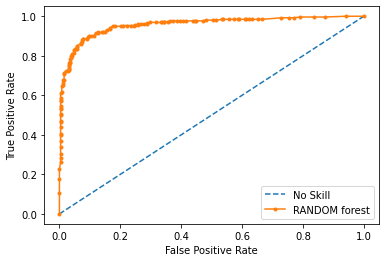

In [373]:

ns_probs = [0 for _ in range(len(y_test))]
lr_probs = Random_forest.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='RANDOM forest')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()
# roc_curve(y)

##### TEST Data

In [694]:
intersection_columns=test_data.columns& X_train.columns 
X_test_data=test_df[intersection_columns]
X_test_data

ID  var3  var15  ind_var5_0  ind_var5  ind_var30  ind_var39_0  \
0      64252     2     42           1         1          1            1   
1      31278     2     38           1         1          1            1   
2     148245     2     23           1         1          1            1   
3     133657     2     25           1         1          1            1   
4      68463     2     25           1         1          1            1   
...      ...   ...    ...         ...       ...        ...          ...   
5801   13465     2     44           1         0          0            1   
5802   72921     2     55           1         1          1            1   
5803  140690     2     23           1         1          1            1   
5804   27590     2     23           1         1          1            1   
5805   63508     2     25           1         1          1            1   

      ind_var41_0  num_var4  num_var5  ...  num_meses_var5_ult3  \
0               1         2         3  ...                    3   
1               1         2         3  ...                    3   
2               1         1         3  ...                    3   
3               1         1         3  ...                    3   
4               1         1         3  ...                    3   
...           ...       ...       ...  ...                  ...   
5801            1         0         0  ...                    0   
5802            1         2         3  ...                    3   
5803            1         1         3  ...                    1   
5804            1         1         3  ...                    2   
5805            1         1         3  ...                    3   

      num_meses_var39_vig_ult3  num_var45_hace2  num_var45_hace3  \
0                            2                0                0   
1                            2                0                6   
2                            1                0                0   
3                            1                0                0   
4                            2                0                0   
...                        ...              ...              ...   
5801                         2                0                0   
5802                         2                0               30   
5803                         1                0                0   
5804                         2                3                0   
5805                         2                0                0   

      num_var45_ult3  saldo_medio_var5_hace2  saldo_medio_var5_hace3  \
0                  0                  107.19                   23.22   
1                  6                 2355.30                  108.63   
2                  0                    3.00                    0.33   
3                  0                   90.00                    5.82   
4                  0                    3.00                    2.70   
...              ...                     ...                     ...   
5801               0                    0.00                    0.00   
5802              36                12622.71                    1.59   
5803               9                    0.00                    0.00   
5804               6                  674.97                    0.00   
5805               0                    3.00                    0.30   

      saldo_medio_var5_ult1  saldo_medio_var5_ult3       var38  
0                    177.87                 102.75  117310.979  
1                   3302.97                1922.31   42403.350  
2                      3.00                   2.10  238795.140  
3                     90.00                  61.95  105854.070  
4                      3.00                   2.91   81031.830  
...                     ...                    ...         ...  
5801                   0.00                   0.00   43675.170  
5802               18813.96               10479.42   38451.450  
5803                  27.00          

In [341]:
y_pred=Random_forest.predict(X_test_data)

In [567]:
##print shape
# test_data[y_pred==0]
# test_data[y_pred!=0]

#### SMOTE

In [394]:
from imblearn.over_sampling import SMOTE


In [590]:
smote=SMOTE(random_state=2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 30)
X_train_res, y_train_res=smote.fit_sample(X_train,y_train.ravel())


In [493]:
print(X_train_res.shape)
print(y_train_res.shape)

(17824, 33)
(17824,)


In [494]:
# X_train, X_test, y_train, y_test = train_test_split(X_train_res, y_train_res, test_size = 0.25, random_state = 30)

In [495]:
Random_forest_model=RandomForestClassifier(n_estimators=200,criterion='gini')
Random_forest_model.fit(X_train_res,y_train_res.ravel())

RandomForestClassifier(n_estimators=200)

In [496]:
y_pred=Random_forest_model.predict(X_test)

In [497]:
plot_cm=pd.crosstab(y_test,y_pred, rownames = ['Actual'], colnames =['Predicted'], margins = True)
plot_cm

Predicted     0    1   All
Actual                    
0          3599  204  3803
1           280  117   397
All        3879  321  4200

In [498]:
f1_score(y_test,y_pred)

0.3259052924791086

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.969


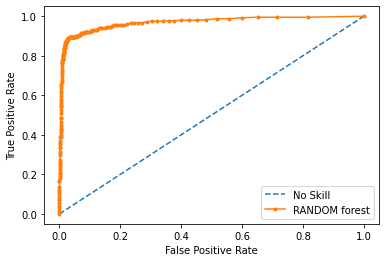

In [499]:
ns_probs = [0 for _ in range(len(y_test))]
lr_probs = Random_forest.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='RANDOM forest')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()
# roc_curve(y)

#### Random Forest Tuning
<!-- weighting -->

In [507]:
from numpy import mean
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

In [511]:
w = 50
# model=RandomForestClassifier(n_estimators=200,class_weight={0: 1, 1: w})
model=RandomForestClassifier(n_estimators=200,class_weight='balanced_subsample')
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [512]:
scores = cross_val_score(model, X_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)

In [513]:
print('Mean ROC AUC: %.3f' % mean(scores))

Mean ROC AUC: 0.811


#### Conclusion Bagging Method for Imbalance data
###### Undersampling
###### SMOTE



##### Boosting Method

In [571]:
!pip install xgboost

In [572]:
from xgboost import XGBClassifier

In [657]:
XGmodel=XGBClassifier(verbosity=3,enable_categorical=True)
X

[01:20:26] ======== Monitor: Learner ========
[01:20:26] Configure: 0.000621s, 1 calls @ 621us

[01:20:26] ======== Monitor: GBTree ========
[01:20:26] ======== Monitor: TreePruner ========


ID  var3  var15  ind_var5_0  ind_var5  ind_var30  ind_var39_0  \
0      142882     2     55           1         1          1            1   
1      116073     2     26           1         1          1            1   
2       40727     2     31           1         1          1            1   
3       96753    89     55           0         0          0            1   
4      105319     2     24           1         1          1            1   
...       ...   ...    ...         ...       ...        ...          ...   
13994   30124     2     28           1         1          1            1   
13995   77621     2     24           1         1          1            0   
13996   84866     2     23           1         1          1            1   
13997   80860     2      9           0         0          1            0   
13998    9460     2     25           1         1          1            1   

       ind_var41_0  num_var4  num_var5  ...  num_meses_var5_ult3  \
0                1         3         3  ...                    3   
1                1         1         3  ...                    2   
2                1         3         3  ...                    3   
3                1         1         0  ...                    0   
4                1         1         3  ...                    3   
...            ...       ...       ...  ...                  ...   
13994            1         1         3  ...                    3   
13995            0         1         3  ...                    3   
13996            1         1         3  ...                    3   
13997            0         1         0  ...                    0   
13998            1         1         3  ...                    3   

       num_meses_var39_vig_ult3  num_var45_hace2  num_var45_hace3  \
0                             2                0                0   
1                             1                0                0   
2                             2               12               45   
3                             2                6                0   
4                             1                0                0   
...                         ...              ...              ...   
13994                         2                3                3   
13995                         0                0                0   
13996                         2                0                0   
13997                         0                0                0   
13998                         2                0                0   

       num_var45_ult3  saldo_medio_var5_hace2  saldo_medio_var5_hace3  \
0                   0                   30.00                   10.65   
1                   0                    3.00                    0.00   
2                  96                  230.52                   38.58   
3                   6                    0.00                    0.00   
4                   0                    3.00                    0.27   
...               ...                     ...                     ...   
13994              12                   30.00                   16.08   
13995               0                    3.00                    2.79   
13996               0                    3.00                    0.63   
13997               0                    0.00                    0.00   
13998               0                    3.00                    0.27   

       saldo_medio_var5_ult1  saldo_medio_var5_ult3      var38  
0                      24.27                  21.63   59375.97  
1                       3.00                   3.00  117951.42  
2                     682.20                 317.10   81164.61  
3                       0.00                   0.00  137912.85  
4                       3.00                   2.10   40407.66  
...                      ...                    ...        ...  
13994                  30.00                  25.35  197302.95  
13995                   3.00                   2.94  11

In [688]:
# print(X)

# train_df_masked=X.mask(X==0).fillna(X.mean(axis=0))
# train_df_masked
# X_val=train_df_masked.astype(float)
# X_val
# X_val=train_df_masked.round(decimals=2)

# # X_val = train_df_masked.round(decimals=6).astype(object)
# # X_val=train_df_masked.astype(str).replace('+.0+',' ')
# # X_val=X_val.astype(float)
# X_val.info()
# # X=X.astype(int)
# # X.info()

In [689]:
X_train, X_test, y_train, y_test = train_test_split(X_train_res, y_train_res, test_size = 0.25, random_state = 30)

In [691]:
XGmodel.fit(X_train,y_train)
y_xgpred=XGmodel.predict(X_test)
plot_cm=pd.crosstab(y_test,y_xgpred, rownames = ['Actual'], colnames =['Predicted'], margins = True)


C:\Users\HP\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[01:39:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { enable_categorical } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[01:39:36] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 78 extra nodes, 0 pruned nodes, max_depth=6
[01:39:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:39:36] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning e

[01:39:36] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 44 extra nodes, 0 pruned nodes, max_depth=6
[01:39:36] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 40 extra nodes, 0 pruned nodes, max_depth=6
[01:39:36] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 74 extra nodes, 0 pruned nodes, max_depth=6
[01:39:36] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 66 extra nodes, 0 pruned nodes, max_depth=6
[01:39:36] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 94 extra nodes, 0 pruned nodes, max_depth=6
[01:39:36] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 50 extra nodes, 0 


[01:39:37] ======== Monitor: GBTree ========
[01:39:37] BoostNewTrees: 1.07753s, 100 calls @ 1077533us

[01:39:37] CommitModel: 0.000155s, 100 calls @ 155us

[01:39:37] ======== Monitor: TreePruner ========
[01:39:37] PrunerUpdate: 0.138384s, 100 calls @ 138384us

[01:39:37] ======== Monitor: Learner ========
[01:39:37] Configure: 0.000591s, 1 calls @ 591us

[01:39:37] ======== Monitor: GBTree ========
[01:39:37] ======== Monitor: TreePruner ========


In [692]:
print(plot_cm)
f1_score(y_test,y_xgpred)

Predicted     0     1   All
Actual                     
0          2079   122  2201
1           162  2093  2255
All        2241  2215  4456


0.9364653243847875

In [696]:
test_pred=XGmodel.predict(X_test_data)

In [700]:
print(len(test_pred[test_pred==0]))
print(len(test_pred[test_pred!=0]))

5270
536
